<img src="https://pbs.twimg.com/profile_images/558948878951542785/ig4juBgo_400x400.jpeg" width=70px> 

## Pengenalan OpenCV part 2

Halo! Kembali lagi dengan pengenalan OpenCV bagian 2. Kali ini masih lanjut dengan materi pembahasan kita yang paling asyik. Ayo kita mulai

#### Karena disini menggunakan google collab, maka terlebih dahulu kita buka akses ke drive kita sendiri

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


#### Seperti biasa, lakukan import cv2 terlebih dahulu, lalu load gambar yang kalian inginkan

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('gdrive/My Drive/FG Part 2/pokemon.jpg')
print('Ukuran Gambar',img.shape)

Ukuran Gambar (600, 800, 3)


#### Crop

Crop merupakan suatu cara untuk memotong gambar. Pada notebook ini, kita akan memotong gambar ini menjadi setengah

In [0]:
#memotong gambar jadi setengah
#img[height,width]
cropped = img[300:600,1:800]

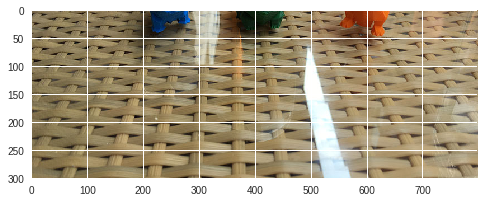

In [0]:
plt.imshow(cv2.cvtColor(cropped,cv2.COLOR_BGR2RGB))

#### Konvolusi

Konvolusi merupakan salah satu operasi yang digunakan untuk memanipulasi gambar dengan menggunakan kernel. dibawah ini merupakan contoh kernel yang biasa dipakai

##### Kernel Konvolusi

Edge
$$\begin{bmatrix}
    0       & 1 & 0 \\
    1       & -4 & 1 \\
    0       & 1 & 0 \
\end{bmatrix}$$

Blur
$$\begin{bmatrix}
    1/9       & 1/9 & 1/9 \\
    1/9       & 1/9 & 1/9 \\
    1/9      & 1/9 & 1/9\
\end{bmatrix}$$

Sharp
$$\begin{bmatrix}
    0       & -1 & 0 \\
    -1       & 5 & -1 \\
    0       & -1 & 0 \
\end{bmatrix}$$

In [0]:
edge = np.array(([0,1,0],
                [1,-4,1],
                [0,1,0]), dtype="int")

blur = np.array(([1/9, 1/9, 1/9],
                [1/9,1/9,1/9],
                [1/9,1/9,1/9]), dtype="float")

sharpen = np.array(([0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]), dtype="int")

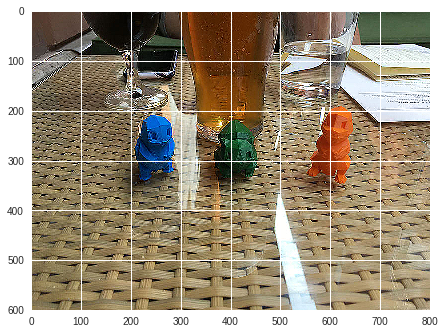

In [0]:
imgedge = cv2.filter2D(img,-1,sharpen)
plt.imshow(cv2.cvtColor(imgedge,cv2.COLOR_BGR2RGB))

#### Image Smoothing

Image Smoothing adalah proses menghilangkan noise yang ada pada gambar. Untuk bagian ini kita akan membutuhkan gambar yang banyak noisenya seperti pada contoh berikut

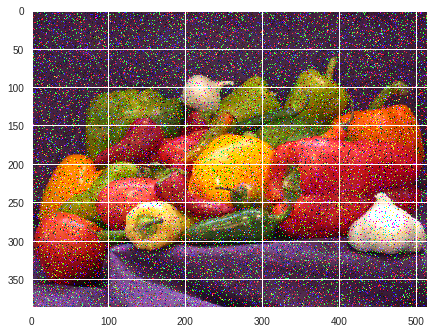

In [0]:
imgwnoise = cv2.imread('gdrive/My Drive/FG Part 2/imagewnoise.png')
plt.imshow(cv2.cvtColor(imgwnoise,cv2.COLOR_BGR2RGB))

Teknik image smoothing ada 2, yaitu
1. Mean Filtering
2. Median Filtering

##### Mean Filtering
Mean filtering merupakan filtering yang dilakukan dengan cara merata-ratakan satu kernel

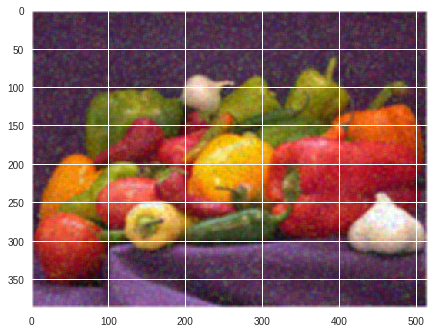

In [0]:
mean = cv2.blur(imgwnoise,(5,5))
plt.imshow(cv2.cvtColor(mean,cv2.COLOR_BGR2RGB))

##### Median Filtering
Median filtering merupakan filtering yang dilakukan dengan cara mencari nilai tengah pada satu kernel

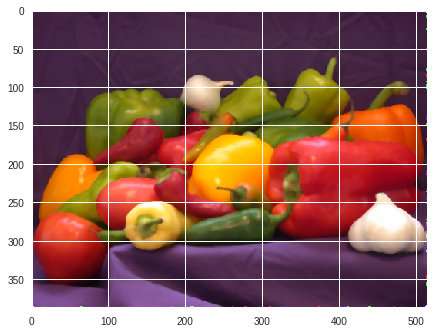

In [0]:
median = cv2.medianBlur(imgwnoise,5)
plt.imshow(cv2.cvtColor(median,cv2.COLOR_BGR2RGB))

#### Morfological Transformation

##### Dilasi
Dilasi merupakan proses penebalan sebuah objek. Objek tersebut akan ditebalkan dengan menggunakan elemen struktur

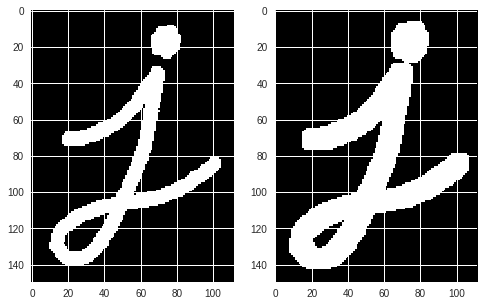

In [0]:
imagej = cv2.imread('gdrive/My Drive/FG Part 2/j.png',0)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(imagej,kernel,iterations=1)

plt.subplot(121)
plt.imshow(imagej,cmap='gray')

plt.subplot(122)
plt.imshow(dilation,cmap='gray')

##### Erosi
Erosi merupakan proses penipisan sebuah objek, sama seperti dilasi objek akan ditipiskan dengan menggunakan elemen struktur

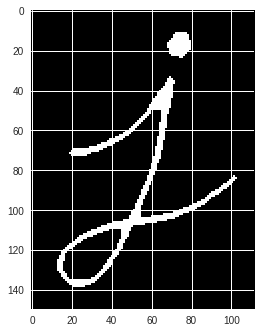

In [0]:
erosion = cv2.erode(imagej,kernel,iterations = 1)
plt.imshow(erosion,cmap='gray')

##### Opening
Opening merupakan sebuah proses untuk melakukan erosi terlebih dahulu baru melakukan dilasi. Proses ini biasanya digunakan untuk menghilangkan objek-objek kecil dan kurus serta dapat membuat tepi citra lebih smooth (untuk citra berukuran besar).

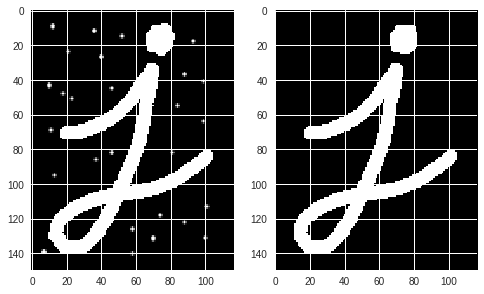

In [0]:
imgopening = cv2.imread('gdrive/My Drive/FG Part 2/opening.png',0)
opening = cv2.morphologyEx(imgopening, cv2.MORPH_OPEN, kernel)

plt.subplot(121)
plt.imshow(imgopening,cmap='gray')

plt.subplot(122)
plt.imshow(opening,cmap='gray')

##### Closing
Closing merupakan sebuah proses untuk melakukan dilasi terlebih dahulu baru melakukan erosi. Proses ini biasanya digunakan untuk mengisi lubang pada objek atau menggabungkan kedua objek

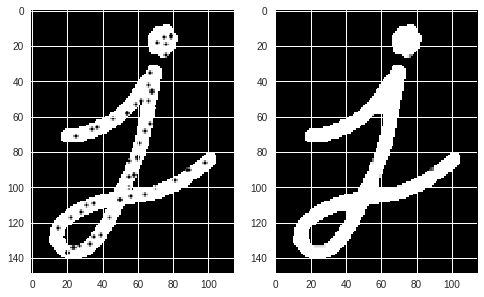

In [0]:
imgclosing = cv2.imread('gdrive/My Drive/FG Part 2/closing.png',0)
closing = cv2.morphologyEx(imgclosing, cv2.MORPH_CLOSE, kernel)

plt.subplot(121)
plt.imshow(imgclosing,cmap='gray')

plt.subplot(122)
plt.imshow(closing,cmap='gray')

#### Segmentasi
Segmentasi merupakan sebuah teknik yang digunakan untuk menandai suatu daerah. Ada beberapa metode segmentasi, diantaranya adalah
1. Thresholding
2. Seed Region Growth
Namun, pada notebook ini tidak akan dijelaskan codingannya.

#### Tugas

Buatlah review paper minimal 1 halaman. Untuk file papernya sendiri cari di IEEE
1. Vehicle classification and surveillance using machine learning technique
2. Automatic age classification with LBP
3. Content Based Color Image Classification using SVM

Dikumpulkan pada saat FG selanjutnya. Untuk hasil reviewnya diupload di github MM.